# Otto商品分类——随机森林
原始特征+tfidf特征

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dpath = './data/'

train1 = pd.read_csv(dpath +"Otto_FE_train_org.csv")
train2 = pd.read_csv(dpath +"Otto_FE_train_tfidf.csv")

#去掉多余的id
train2 = train2.drop(["id","target"], axis=1)
train =  pd.concat([train1, train2], axis = 1, ignore_index=False)
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,1,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.075886,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,4,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,...,0.460983,0.000000,0.008244,0.022456,0.0,0.0,0.000000,0.0,0.0,0.0
4,5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.124622,0.000000,0.000000,0.0,0.0,0.145988,0.0,0.0,0.0


In [3]:
del train1
del train2

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Columns: 188 entries, id to feat_93_tfidf
dtypes: float64(186), int64(1), object(1)
memory usage: 88.8+ MB


In [5]:
y = train['target']
X = train.drop(['id', 'target'], axis=1)

feat_names = X.columns

from scipy.sparse import csr_matrix

X = csr_matrix(X)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=5000, train_size=20000, random_state=66)

X_train = pd.DataFrame(data=X_train.toarray(), columns=feat_names)
X_train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,0.000000,0.000000,0.000000,0.057143,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.076225,0.0
1,0.049180,0.000000,0.000000,0.028571,0.052632,0.0,0.078947,0.013158,0.0,0.066667,...,0.0,0.000000,0.054476,0.037096,0.0,0.082918,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.015625,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.116853,0.000000,0.058701,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.343179,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.032787,0.019608,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [8]:
X_val = pd.DataFrame(data=X_val.toarray(), columns=feat_names)
X_val.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.013158,0.000000,0.0,...,0.0,0.0,0.056377,0.000000,0.061914,0.000000,0.0,0.000000,0.000000,0.0
1,0.04918,0.0,0.0,0.0,0.0,0.0,0.0,0.184211,0.023256,0.0,...,0.0,0.0,0.024661,0.201523,0.027084,0.150148,0.0,0.182952,0.036593,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.046512,0.0,...,0.0,0.0,0.304520,0.103684,0.250823,0.000000,0.0,0.000000,0.000000,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.113359,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.147842,0.000000,0.324727,0.000000,0.0,0.000000,0.000000,0.0


## 默认参数的随机森林模型

In [23]:
from sklearn.ensemble import RandomForestClassifier

RF1 = RandomForestClassifier(random_state=66, oob_score=True)
RF1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=66, verbose=0,
                       warm_start=False)

In [14]:
loss = cross_val_score(RF1, X_train, y_train, cv=3, n_jobs=-1, scoring='neg_log_loss')
print ('logloss of each fold is: ',-loss)
print('mean cv logloss is:', -loss.mean())

logloss of each fold is:  [0.66633803 0.64327054 0.65892584]
mean cv logloss is: 0.6561781348990419


In [24]:
y_predict = RF1.predict(X_val)

print('准确率为：', RF1.score(X_val, y_val), '\n')

print("Confusion matrix:\n%s" % confusion_matrix(y_val, y_predict))

准确率为： 0.7866 

Confusion matrix:
[[  42    9    3    0    0   18    2   55   34]
 [   0 1121  150    8    2    3    6    4    2]
 [   1  297  296    5    0    1    8    3    1]
 [   0  106   38   74    2   10    0    0    0]
 [   0   11    0    0  196    0    0    0    1]
 [   4    8    1    4    0 1072    7   23   15]
 [   2   34   24    0    2   22  116   22    3]
 [   3    8    4    1    0   22    1  663    8]
 [   4   16    0    0    1   22    1   25  353]]


虽然结果还是不好，但比默认参数的单棵树性能还是好太多

## 随机森林超参数调优

随机森林的超参会有很多：
Bagging参数：
1. 树的数目n_estimators

与决策树的共同的超参数：
1. max_depth（树的深度）或max_leaf_nodes（叶子结点的数目）；
2. min_samples_leaf（叶子结点的最小样本数）、min_samples_split（中间结点的最小样本树）、min_weight_fraction_leaf（叶子节点的样本权重占总权重的比例）
3. max_features（最大特征数目）。与决策树max_features通常越大模型性能越好不同，随机森林中max_features较小，每个基学习器之间的相关性更小，集成模型的性能可能反而会更好；

另外在随机森林中，由于学习每个基学习器只用了一部分样本，可用其余样本（包外样本）做校验，从而不必显式进行交叉验证。
设置参数oob_score=True

0.79005 200


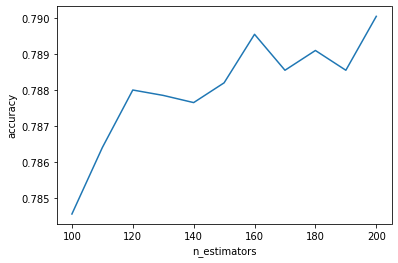

In [29]:
# n_estimators
scores = []

for i in range(100, 210, 10):
    RF2 = RandomForestClassifier(random_state=66, n_estimators=i, n_jobs=-1, oob_score=True)
    RF2.fit(X_train, y_train) 
    scores.append(RF2.oob_score_)

print(max(scores), [*range(100, 210, 10)][scores.index(max(scores))])

plt.plot(range(100, 210, 10), scores)
plt.xlabel( 'n_estimators' )                                                                                                      
plt.ylabel( 'accuracy' )
plt.show()

0.7916 300


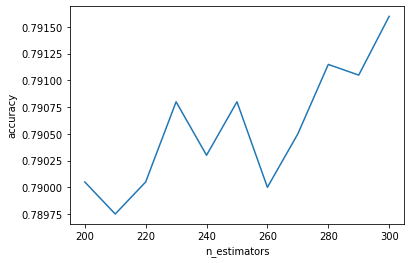

In [32]:
scores = []

for i in range(200, 310, 10):
    RF2 = RandomForestClassifier(random_state=66, n_estimators=i, n_jobs=-1, oob_score=True)
    RF2.fit(X_train, y_train) 
    scores.append(RF2.oob_score_)

print(max(scores), [*range(200, 310, 10)][scores.index(max(scores))])

plt.plot(range(200, 310, 10), scores)
plt.xlabel( 'n_estimators' )                                                                                                      
plt.ylabel( 'accuracy' )
plt.show()

0.79305 400


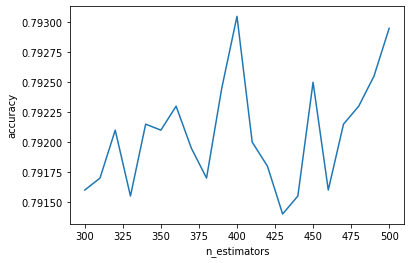

In [33]:
scores = []

for i in range(300, 501, 10):
    RF2 = RandomForestClassifier(random_state=66, n_estimators=i, n_jobs=-1, oob_score=True)
    RF2.fit(X_train, y_train) 
    scores.append(RF2.oob_score_)

print(max(scores), [*range(300, 501, 10)][scores.index(max(scores))])

plt.plot(range(300, 501, 10), scores)
plt.xlabel( 'n_estimators' )                                                                                                      
plt.ylabel( 'accuracy' )
plt.show()

In [34]:
max_depth = range(10,201,10)  
tuned_parameters = dict(max_depth=max_depth)

RF3 = RandomForestClassifier(random_state=66, n_estimators=400, n_jobs=-1)

grid = GridSearchCV(RF3, param_grid=tuned_parameters, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=400, n_jobs=-1,
                                              oob_score=False, random_state=66,
                                    

In [35]:
grid.best_params_

{'max_depth': 50}

In [36]:
grid.best_score_

0.7837500564215714

In [38]:
mean_test_score = grid.cv_results_['mean_test_score']
std_test_score = grid.cv_results_['std_test_score']
std_test_score

array([0.00330047, 0.00277206, 0.00202488, 0.00216559, 0.0011271 ,
       0.00279142, 0.0019084 , 0.00156915, 0.0014926 , 0.0014926 ,
       0.0014926 , 0.0014926 , 0.0014926 , 0.0014926 , 0.0014926 ,
       0.0014926 , 0.0014926 , 0.0014926 , 0.0014926 , 0.0014926 ])

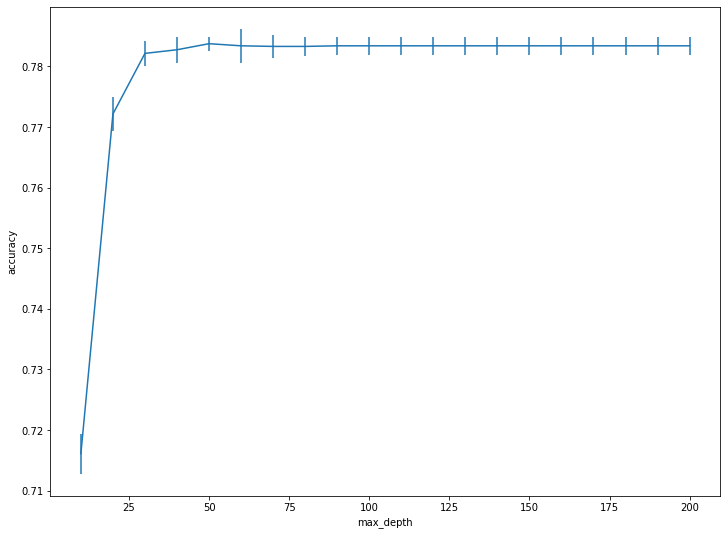

In [40]:
plt.figure(figsize=(12, 9))

plt.errorbar(max_depth, mean_test_score, yerr=std_test_score)
plt.xlabel('max_depth')                                                                                                      
plt.ylabel('accuracy')
plt.show()

In [41]:
# 调整max_features
max_features=np.arange(20, 181, 20)

In [42]:
tuned_parameters = dict(max_features=max_features)

RF4 = RandomForestClassifier(random_state=66, n_estimators=400, n_jobs=-1, max_depth=50)

grid = GridSearchCV(RF4, param_grid=tuned_parameters, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=50,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=400, n_jobs=-1,
                                              oob_score=False, random_state=66,
                                      

In [43]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=30,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=66, verbose=0,
                       warm_start=False)

In [44]:
grid.best_params_

{'max_features': 30}

In [45]:
grid.best_score_

0.7834000064173209

In [48]:
RF4 = RandomForestClassifier(random_state=66, n_estimators=400, n_jobs=-1, 
                             max_depth=50, max_features=30, oob_score=True)
RF4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=30,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=True, random_state=66, verbose=0,
                       warm_start=False)

In [47]:
RF4.score(X_val, y_val)

0.7886

In [49]:
RF4.oob_score_

0.79105

In [50]:
df = pd.DataFrame({"columns":list(feat_names), "importance":list(RF4.feature_importances_.T)})
df = df.sort_values(by=['importance'],ascending=False)
df

,columns,importance
132,feat_40_tfidf,0.036667
10,feat_11,0.032532
126,feat_34_tfidf,0.032334
106,feat_14_tfidf,0.032248
103,feat_11_tfidf,0.027140
...,...,...
176,feat_84_tfidf,0.000428
27,feat_28,0.000421
5,feat_6,0.000366
83,feat_84,0.000357


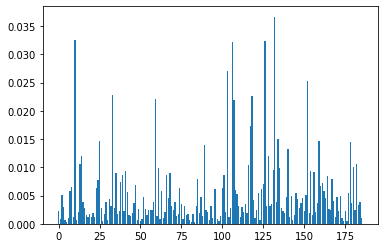

In [51]:
plt.bar(range(len(RF4.feature_importances_)), RF4.feature_importances_)
plt.show()